<a href="https://colab.research.google.com/github/hamza7771/Self_made_learning_projects/blob/main/Multiple_Classificaiton_using_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


In [5]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [36]:
dataset = data
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values


In [46]:

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [49]:
Y[0]

array([1, 0, 0], dtype=uint8)

In [50]:
print(X_train[0])
print(y_train[0])

print(X_test[0])
print(y_test[0])

[6.4 3.1 5.5 1.8]
[0 0 1]
[5.8 2.8 5.1 2.4]
[0 0 1]


In [79]:
model = Sequential()

model.add(Dense(4 ,input_shape=(4,), activation='relu'))
model.add(Dense(5 , activation='relu'))
model.add(Dense(3 , activation='softmax'))




In [80]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history=model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

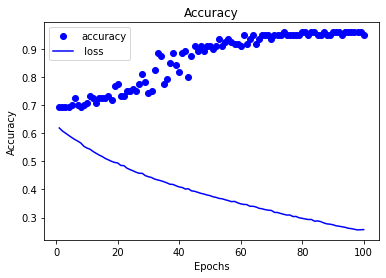

In [84]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
accuracy = history_dict["accuracy"]
loss = history_dict["loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy , "bo", label="accuracy")
plt.plot(epochs, loss     , "b" , label=" loss")
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [85]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [86]:
for i in range(len(y_test_class)):
  print(y_test_class[i],y_pred_class[i])

2 2
1 1
0 0
2 2
0 0
2 2
0 0
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
2 2
1 2
0 0
0 0
2 2
0 0
0 0
1 1
1 1
0 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.50      0.67        10
           2       0.62      1.00      0.76         8

    accuracy                           0.83        30
   macro avg       0.87      0.83      0.81        30
weighted avg       0.90      0.83      0.83        30

[[12  0  0]
 [ 0  5  5]
 [ 0  0  8]]


In [87]:
#model.evaluate(X_,X_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')